# Introduction to Survival Analysis

**Using NIPA Saturn**

Current notebook uses lifelines: https://lifelines.readthedocs.io/en/latest/Survival%20Analysis%20intro.html

Also consider trying scikit-survival, which has more sophisticated methods: https://k-d-w.org/project/scikit-survival/, https://www.jmlr.org/papers/volume21/20-729/20-729.pdf
* [Models for time-to-event data (2018 talk slide by the scikit-survival author)](https://k-d-w.org/talk/nantes-2018/documents/slides.pdf) -- "Cox PH model is surprisingly hard to beat."
* [Survival Analysis for Deep Learning (Google colab code)](https://colab.research.google.com/github/sebp/survival-cnn-estimator/blob/master/tutorial_tf2.ipynb)

Awesome example notebooks are available at https://github.com/CamDavidsonPilon/lifelines/tree/master/examples.
* SaaS churn and piecewise regression models: [A notebook that demonstrates how to use the PiecewiseExponentialRegressionFitter for understanding SaaS customer churn](https://nbviewer.jupyter.org/github/CamDavidsonPilon/lifelines/blob/master/examples/SaaS%20churn%20and%20piecewise%20regression%20models.ipynb), https://statwonk.com/parametric-survival.html
* Customer churn: https://github.com/CamDavidsonPilon/lifelines/blob/master/examples/Customer%20Churn.ipynb
* https://github.com/chrisluedtke/data-science-journal/blob/master/07-Advanced-Regression/02_Survival_Analysis.ipynb

## Must-read tutorial papers
* [Survival Analysis Part I: Basic concepts and first analyses (Clark et al., 2003)](https://www.nature.com/articles/6601118)
* [Survival Analysis Part II: Multivariate data analysis – an introduction to concepts and methods (Bradburn et al., 2003)](https://www.nature.com/articles/6601119)
* [Survival Analysis Part III: Multivariate data analysis – choosing a model and assessing its adequacy and fit (Bradburn et al., 2003)](https://www.nature.com/articles/6601120)
* [Survival Analysis Part IV: Further concepts and methods in survival analysis (Clark et al., 2003)](https://www.nature.com/articles/6601117)



## Censoring

Observed lifetimes at time 10:
 [ 1.87052384  1.61842827  6.63391354  0.7201065   3.38975251  1.24928598
  7.23096944  0.07412456  1.20864699  1.90151406  2.49780933  8.61571184
 10.          0.46558476  0.33876898  1.22159369 10.          5.04986589
  1.87750751  9.67630242  0.31006723  2.4194329  10.          0.99736558
  0.53224387]


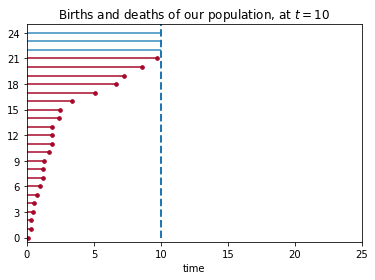

In [1]:
from lifelines.plotting import plot_lifetimes
import numpy as np
from numpy.random import uniform, exponential

N = 25

CURRENT_TIME = 10

actual_lifetimes = np.array([
    exponential(12) if (uniform() < 0.5) else exponential(2) for i in range(N)
])
observed_lifetimes = np.minimum(actual_lifetimes, CURRENT_TIME)
death_observed = actual_lifetimes < CURRENT_TIME

ax = plot_lifetimes(observed_lifetimes, event_observed=death_observed)

ax.set_xlim(0, 25)
ax.vlines(10, 0, 30, lw=2, linestyles='--')
ax.set_xlabel("time")
ax.set_title("Births and deaths of our population, at $t=10$")
print("Observed lifetimes at time %d:\n" % (CURRENT_TIME), observed_lifetimes)

(0.0, 25.0)

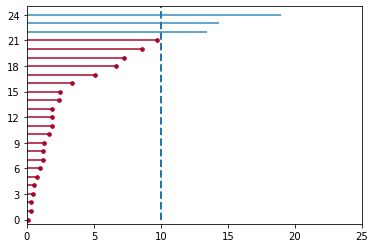

In [2]:
ax = plot_lifetimes(actual_lifetimes, event_observed=death_observed)
ax.vlines(10, 0, 30, lw=2, linestyles='--')
ax.set_xlim(0, 25)

### Getting data into the right format: `datetimes_to_durations`

Refer to https://lifelines.readthedocs.io/en/latest/lifelines.utils.html#lifelines.utils.datetimes_to_durations
* fill_date (a datetime, array, Series or DataFrame, optional (default=datetime.Today())) – the date to use if end_times is a missing or empty. This corresponds to last date of observation. Anything after this date is also censored
* freq (string, optional (default=’D’)) – the units of time to use. See Pandas ‘freq’. Default ‘D’ for days. (https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases) For example, 'M': monthly, 'W': weekly, 'H': hourly, 'T':minutely.


In [3]:
from lifelines.utils import datetimes_to_durations

start_date = ['2013-10-10 0:00:00', '2013-10-09', '2013-10-10']
end_date = ['2013-10-13', '2013-10-10', None]
T, E = datetimes_to_durations(start_date, end_date, fill_date='2013-10-15')
print('T (durations): ', T)
print('E (event_observed): ', E)

T (durations):  [3. 1. 5.]
E (event_observed):  [ True  True False]


## Estimating the survival function using Kaplan-Meier

In [4]:
from lifelines.datasets import load_dd

data = load_dd()
data

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700.0,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1803,Zambia,551,551.0,Eastern Africa,Africa,Levy Patrick Mwanawasa,Levy Patrick Mwanawasa.Zambia.2002.2007.Civili...,Non-democracy,Civilian Dict,2002,6,1
1804,Zambia,551,551.0,Eastern Africa,Africa,Rupiah Bwezani Banda,Rupiah Bwezani Banda.Zambia.2008.2008.Civilian...,Non-democracy,Civilian Dict,2008,1,0
1805,Zimbabwe,552,552.0,Eastern Africa,Africa,Ian Smith,Ian Smith.Zimbabwe.1965.1978.Civilian Dict,Non-democracy,Civilian Dict,1965,14,1
1806,Zimbabwe,552,552.0,Eastern Africa,Africa,Abel Muzorewa,Abel Muzorewa.Zimbabwe.1979.1979.Civilian Dict,Non-democracy,Civilian Dict,1979,1,1


In [5]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [6]:
# birth: start_year
# (death) observed: retirement or death observed as of 2008
# duration in power (years) --> if death/retirement was not observed, it should be (2008 - start_year) + 1

T = data["duration"]
E = data["observed"]

kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1808 total observations, 340 right-censored observations>

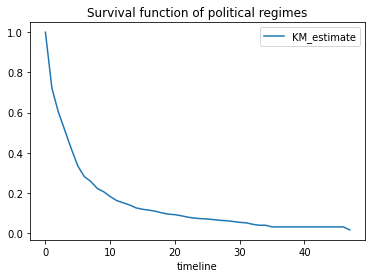

In [7]:
from matplotlib import pyplot as plt

kmf.survival_function_.plot()
plt.title('Survival function of political regimes');

<AxesSubplot:xlabel='timeline'>

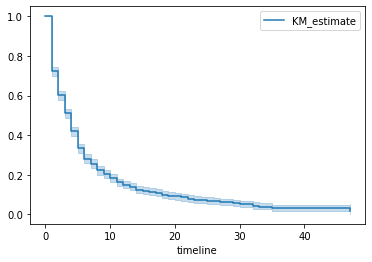

In [8]:
kmf.plot_survival_function()

<AxesSubplot:xlabel='timeline'>

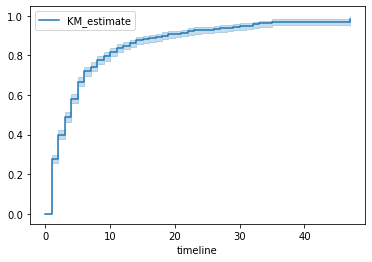

In [9]:
# flipped survival function = (cumulative) conversion function
kmf.plot_cumulative_density()

In [10]:
from lifelines.utils import median_survival_times
median_ci = median_survival_times(kmf.confidence_interval_)
print('median years in power: ', kmf.median_survival_time_)
print()
print(median_ci)

median years in power:  4.0

     KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                     3.0                     4.0


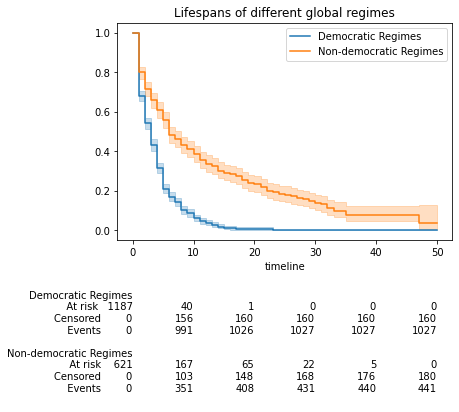

In [11]:
from lifelines.plotting import add_at_risk_counts

ax = plt.subplot(111)

dem = (data["democracy"] == "Democracy")

t = np.linspace(0, 50, 51)

kmf_dem = KaplanMeierFitter(label="Democratic Regimes").fit(T[dem], event_observed=E[dem], timeline=t)
kmf_dem.plot_survival_function(ax=ax)

kmf_ndm = KaplanMeierFitter(label="Non-democratic Regimes").fit(T[~dem], event_observed=E[~dem], timeline=t)
kmf_ndm.plot_survival_function(ax=ax)

add_at_risk_counts(kmf_dem, kmf_ndm, ax=ax)

plt.title("Lifespans of different global regimes");

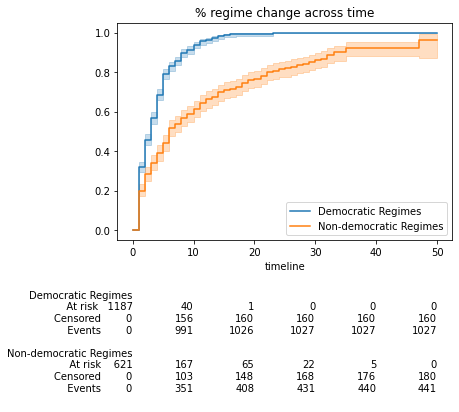

In [13]:
ax = plt.subplot(111)

kmf_dem.plot_cumulative_density(ax=ax)
kmf_ndm.plot_cumulative_density(ax=ax)
add_at_risk_counts(kmf_dem, kmf_ndm, ax=ax)

plt.title("% regime change across time");

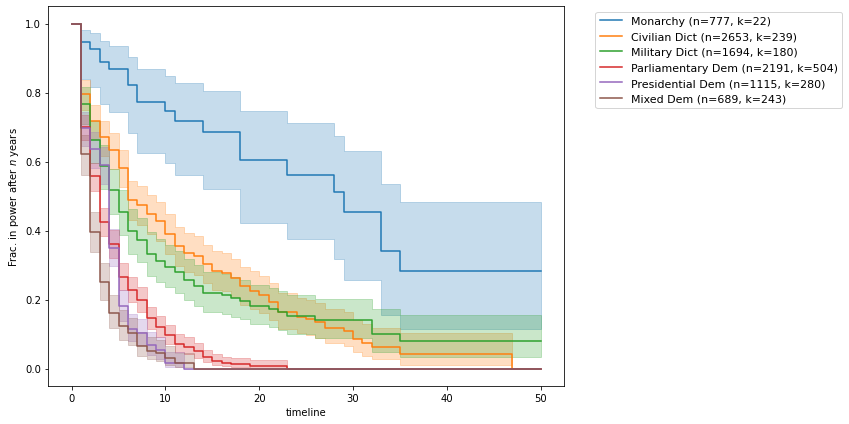

In [35]:
# something similar to cohort plots

regime_types = data['regime'].unique()
fitted_kmf = {}

fig, ax = plt.subplots(figsize=(12,6))

t = np.linspace(0, 50, 51)

for i, regime_type in enumerate(regime_types):

    ix = data['regime'] == regime_type
    fitted_kmf[regime_type] = KaplanMeierFitter(label=regime_type).fit(T[ix], E[ix], timeline=t)
    fitted_kmf[regime_type].plot_survival_function(ax=ax, legend=False)

ax.set_ylabel('Frac. in power after $n$ years')
handles, labels = ax.get_legend_handles_labels()

labels = ['{0} (n={1}, k={2})'.format(regime, np.sum(T[data['regime'] == regime]), np.sum(E[data['regime'] == regime]))
          for regime in labels]

ax.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=11)

plt.tight_layout()



### Testing whether these survive curves are different

See https://lifelines.readthedocs.io/en/latest/Examples.html#statistically-compare-two-populations for other methods

* The `lifelines.statistics.logrank_test()` function compares whether the “death” generation process of the two populations are equal.
  * If the survival functions cross, the logrank test will give an inaccurate assessment of differences.
* If you have more than two populations, 
  * you can use `pairwise_logrank_test()`, which compares each pair in the same manner as above, 
  * or `multivariate_logrank_test()`, which tests the hypothesis that all the populations have the same “death” generation process.


In [18]:
# The function lifelines.statistics.logrank_test() is a common statistical test in survival analysis 
# that compares two event series’ generators. 
# If the value returned exceeds some pre-specified value, 
# then we rule that the series have different generators.

from lifelines.statistics import logrank_test

results = logrank_test(T[dem], T[~dem], E[dem], E[~dem], alpha=.99)

results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         260.47 <0.005    192.23

* Four types of weighted logrank test are currently available in lifelines through the weightings argument: 
  * the Wilcoxon (weightings='wilcoxon'), 
  * Tarone-Ware (weightings='tarone-ware'), 
  * Peto (weightings='peto') and 
  * Fleming-Harrington (weightings='fleming-harrington') tests.
  
The Wilcoxon, Tarone-Ware and Peto tests apply more weight to earlier death times. The Peto test is more robust than the Wilcoxon or Tarone-Ware tests when many observations are censored. When p > q, the Fleming-Harrington applies more weight to earlier death times whilst when p < q, it is more sensitive to late differences (for p=q=0 it reduces to the unweighted logrank test). The choice of which test to perform should be made in advance and not retrospectively to avoid introducing bias.

  

In [19]:
import pandas as pd
from lifelines.statistics import multivariate_logrank_test

df = pd.DataFrame({
    'durations': [5, 3, 9, 8, 7, 4, 4, 3, 2, 5, 6, 7],
    'groups': [0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2], # could be strings too
    'events': [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0],
})

results = multivariate_logrank_test(df['durations'], df['groups'], df['events'], weightings='peto')
results.print_summary()

<lifelines.StatisticalResult: multivariate_Peto_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
         test_name = multivariate_Peto_test

---
 test_statistic    p  -log2(p)
           0.95 0.62      0.68

### Survival differences at a point in time

Often analysts want to compare the survival-ness of groups at specific times, rather than comparing the entire survival curves against each other. For example, analysts may be interested in 5-year survival. Statistically comparing the naive Kaplan-Meier points at a specific time actually has reduced power. By transforming the Kaplan-Meier curve, we can recover more power. 

The function `lifelines.statistics.survival_difference_at_fixed_point_in_time_test()` uses the log(-log) transformation implicitly and compares the survival-ness of populations at a specific point in time.

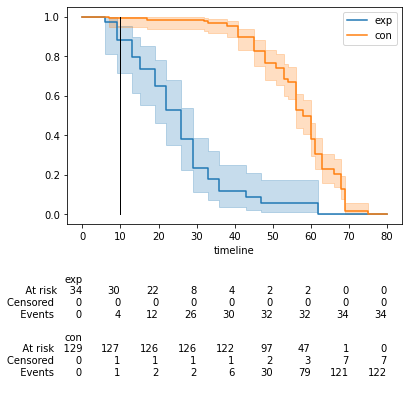

In [35]:
from lifelines.statistics import survival_difference_at_fixed_point_in_time_test
from lifelines.datasets import load_waltons
from lifelines.plotting import add_at_risk_counts

df = load_waltons()
ix = df['group'] == 'miR-137'
T_exp, E_exp = df.loc[ix, 'T'], df.loc[ix, 'E']
T_con, E_con = df.loc[~ix, 'T'], df.loc[~ix, 'E']

t = np.linspace(0, 80, 81)

ax = plt.subplot()

kmf_exp = KaplanMeierFitter(label="exp").fit(T_exp, E_exp, timeline=t)
kmf_exp.plot_survival_function(ax=ax)

kmf_con = KaplanMeierFitter(label="con").fit(T_con, E_con, timeline=t)
kmf_con.plot_survival_function(ax=ax)

add_at_risk_counts(kmf_exp, kmf_con, ax=ax)

ax.plot([10, 10], [0, 1], 'k-', linewidth=1)


In [25]:
point_in_time = 10.
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_exp, kmf_con)
results.print_summary()

<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 10.0
           fitterA = <lifelines.KaplanMeierFitter:"exp", fitted with 34 total observations, 0 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"con", fitted with 129 total observations, 7 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic    p  -log2(p)
           6.17 0.01      6.27

### Restricted mean survival times (RMST)

RMST is a good metric for comparing two survival curves, as their difference represents the area between the curves (see figure below) which is a measure of “time lost”. The upper limit of the integral above is often finite because the tail of the estimated survival curve has high variance and can strongly influence the integral.


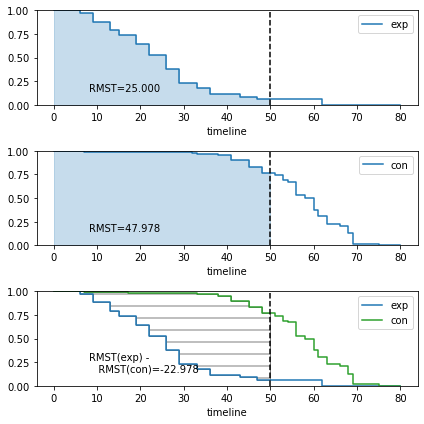

In [32]:
from lifelines.plotting import rmst_plot

fig, axs = plt.subplots(3, 1, figsize=(6, 6))

time_limit = 50

rmst_plot(kmf_exp, t=time_limit, ax=axs[0])
rmst_plot(kmf_con, t=time_limit, ax=axs[1])
rmst_plot(kmf_exp, model2=kmf_con, t=time_limit, ax=axs[2])

plt.tight_layout()

## Estimating hazard rates using Nelson-Aalen


In [40]:
T = data["duration"]
E = data["observed"]

from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()

naf.fit(T,event_observed=E)

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 1808 total observations, 340 right-censored observations>

In [43]:
print(naf.cumulative_hazard_)

          NA_estimate
timeline             
0.0          0.000000
1.0          0.325912
2.0          0.507356
3.0          0.671251
4.0          0.869867
5.0          1.095979
6.0          1.268940
7.0          1.358431
8.0          1.504027
9.0          1.582719
10.0         1.705756
11.0         1.823237
12.0         1.892830
13.0         1.969545
14.0         2.077563
15.0         2.135430
16.0         2.172643
17.0         2.222158
18.0         2.300849
19.0         2.364161
20.0         2.392531
21.0         2.454565
22.0         2.539360
23.0         2.595977
24.0         2.637218
25.0         2.658958
26.0         2.707157
27.0         2.760500
28.0         2.789912
29.0         2.855503
30.0         2.931002
31.0         2.976456
32.0         3.126707
33.0         3.241086
34.0         3.241086
35.0         3.472771
36.0         3.472771
38.0         3.472771
39.0         3.472771
40.0         3.472771
42.0         3.472771
44.0         3.472771
46.0         3.472771
47.0      

<AxesSubplot:xlabel='timeline'>

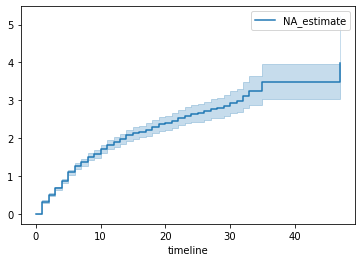

In [42]:
naf.plot_cumulative_hazard()

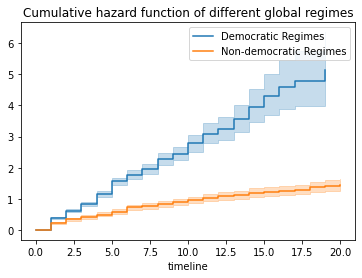

In [44]:
naf.fit(T[dem], event_observed=E[dem], label="Democratic Regimes")
ax = naf.plot_cumulative_hazard(loc=slice(0, 20))

naf.fit(T[~dem], event_observed=E[~dem], label="Non-democratic Regimes")
naf.plot_cumulative_hazard(ax=ax, loc=slice(0, 20))

plt.title("Cumulative hazard function of different global regimes");

Interpretation of the cumulative hazard function can be difficult – it is not how we usually interpret functions. On the other hand, most survival analysis is done using the cumulative hazard function, so understanding it is recommended.

Alternatively, we can derive the more interpretable hazard function, but there is a catch. The derivation involves a kernel smoother (to smooth out the differences of the cumulative hazard function) , and this requires us to specify a bandwidth parameter that controls the amount of smoothing. This functionality is in the `smoothed_hazard_()` and `smoothed_hazard_confidence_intervals_()` methods. Why methods? They require an argument representing the bandwidth.

There is also a `plot_hazard()` function (that also requires a bandwidth keyword) that will plot the estimate plus the confidence intervals, similar to the traditional plot() functionality.


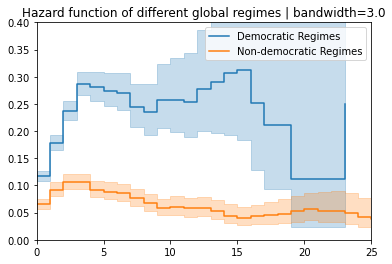

In [45]:
bandwidth = 3.

naf.fit(T[dem], event_observed=E[dem], label="Democratic Regimes")
ax = naf.plot_hazard(bandwidth=bandwidth)

naf.fit(T[~dem], event_observed=E[~dem], label="Non-democratic Regimes")
naf.plot_hazard(ax=ax, bandwidth=bandwidth)

plt.title("Hazard function of different global regimes | bandwidth=%.1f" % bandwidth);
plt.ylim(0, 0.4)
plt.xlim(0, 25);

It is more clear here which group has the higher hazard, and Non-democratic regimes appear to have a constant hazard.



## Estimating cumulative hazards using parametric models

### Fitting to a Weibull model



<lifelines.WeibullFitter:"Weibull_estimate", fitted with 163 total observations, 7 right-censored observations>
   number of observations = 163
number of events observed = 156
           log-likelihood = -672.06
               hypothesis = lambda_ != 1, rho_ != 1

---
          coef   se(coef)   coef lower 95%   coef upper 95%     z      p   -log2(p)
lambda_  55.73       1.33            53.13            58.33 41.26 <0.005        inf
rho_      3.45       0.24             2.97             3.93 10.07 <0.005      76.83
---
AIC = 1348.12

Text(0.5, 1.0, 'Cumulative hazard of Weibull model; estimated parameters')

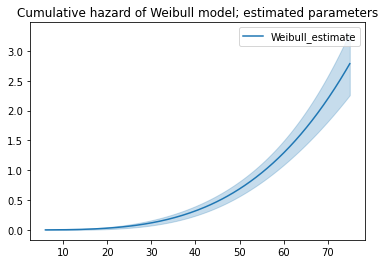

In [47]:
from lifelines import WeibullFitter
from lifelines.datasets import load_waltons

data = load_waltons()

T = data['T']
E = data['E']

wf = WeibullFitter().fit(T, E)

wf.print_summary()
ax = wf.plot_cumulative_hazard()
ax.set_title("Cumulative hazard of Weibull model; estimated parameters")

### Other parametric models: Exponential, Log-Logistic, Log-Normal and Splines

Similarly, there are other parametric models in lifelines. Generally, which parametric model to choose is determined by either knowledge of the distribution of durations, or some sort of model goodness-of-fit. Below are the built-in parametric models, and the Nelson-Aalen non-parametric model, of the same data.



/home/kywch/miniconda3/envs/saturn/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/kywch/miniconda3/envs/saturn/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/kywch/miniconda3/envs/saturn/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/kywch/miniconda3/envs/saturn/lib/python3.7/site-pack

<AxesSubplot:>

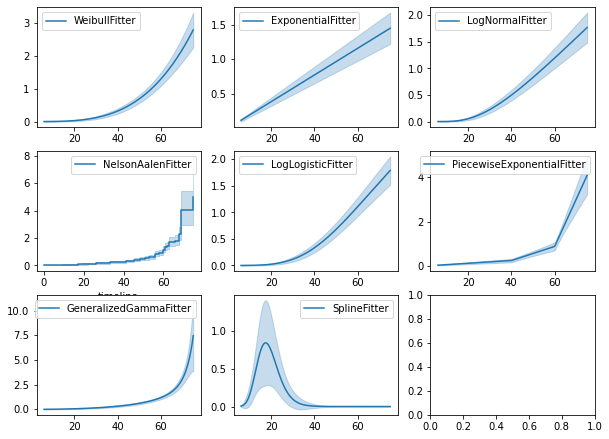

In [48]:
from lifelines import (WeibullFitter, ExponentialFitter,
LogNormalFitter, LogLogisticFitter, NelsonAalenFitter,
PiecewiseExponentialFitter, GeneralizedGammaFitter, SplineFitter)

fig, axes = plt.subplots(3, 3, figsize=(10, 7.5))

wbf = WeibullFitter().fit(T, E, label='WeibullFitter')
exf = ExponentialFitter().fit(T, E, label='ExponentialFitter')
lnf = LogNormalFitter().fit(T, E, label='LogNormalFitter')
naf = NelsonAalenFitter().fit(T, E, label='NelsonAalenFitter')
llf = LogLogisticFitter().fit(T, E, label='LogLogisticFitter')
pwf = PiecewiseExponentialFitter([40, 60]).fit(T, E, label='PiecewiseExponentialFitter')
gg = GeneralizedGammaFitter().fit(T, E, label='GeneralizedGammaFitter')
spf = SplineFitter([6, 20, 40, 75]).fit(T, E, label='SplineFitter')

wbf.plot_cumulative_hazard(ax=axes[0][0])
exf.plot_cumulative_hazard(ax=axes[0][1])
lnf.plot_cumulative_hazard(ax=axes[0][2])
naf.plot_cumulative_hazard(ax=axes[1][0])
llf.plot_cumulative_hazard(ax=axes[1][1])
pwf.plot_cumulative_hazard(ax=axes[1][2])
gg.plot_cumulative_hazard(ax=axes[2][0])
spf.plot_cumulative_hazard(ax=axes[2][1])

Parametric models can also be used to create and plot the survival function, too. Below we compare the parametric models versus the non-parametric Kaplan-Meier estimate:



/home/kywch/miniconda3/envs/saturn/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/kywch/miniconda3/envs/saturn/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/kywch/miniconda3/envs/saturn/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/kywch/miniconda3/envs/saturn/lib/python3.7/site-pack

<AxesSubplot:>

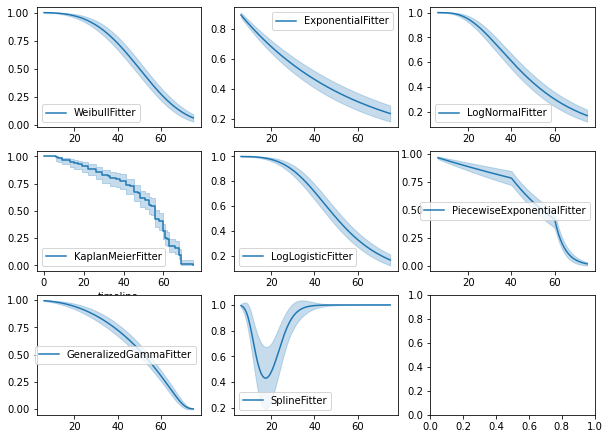

In [50]:
fig, axes = plt.subplots(3, 3, figsize=(10, 7.5))

kmf = KaplanMeierFitter().fit(T, E, label='KaplanMeierFitter')
wbf = WeibullFitter().fit(T, E, label='WeibullFitter')
exf = ExponentialFitter().fit(T, E, label='ExponentialFitter')
lnf = LogNormalFitter().fit(T, E, label='LogNormalFitter')
llf = LogLogisticFitter().fit(T, E, label='LogLogisticFitter')
pwf = PiecewiseExponentialFitter([40, 60]).fit(T, E, label='PiecewiseExponentialFitter')
gg = GeneralizedGammaFitter().fit(T, E, label='GeneralizedGammaFitter')
spf = SplineFitter([6, 20, 40, 75]).fit(T, E, label='SplineFitter')

wbf.plot_survival_function(ax=axes[0][0])
exf.plot_survival_function(ax=axes[0][1])
lnf.plot_survival_function(ax=axes[0][2])
kmf.plot_survival_function(ax=axes[1][0])
llf.plot_survival_function(ax=axes[1][1])
pwf.plot_survival_function(ax=axes[1][2])
gg.plot_survival_function(ax=axes[2][0])
spf.plot_survival_function(ax=axes[2][1])

With parametric models, we have a functional form that allows us to extend the survival function (or hazard or cumulative hazard) past our maximum observed duration. This is called extrapolation. We can do this in a few ways.



Text(0.5, 1.0, 'Survival function of Weibull model; estimated parameters')

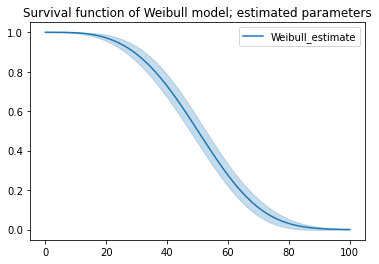

In [51]:
timeline = np.linspace(0, 100, 200)

# use the `timeline` kwarg in `fit`
# by default, all functions and properties will use
# these values provided
wbf = WeibullFitter().fit(T, E, timeline=timeline)

ax = wbf.plot_survival_function()
ax.set_title("Survival function of Weibull model; estimated parameters")